<a href="https://colab.research.google.com/github/hitesh-bhatnagar/PyTorch/blob/main/01_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create known parameters
weight = 0.7
bias = 0.1

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1000],
         [0.1140],
         [0.1280],
         [0.1420],
         [0.1560],
         [0.1700],
         [0.1840],
         [0.1980],
         [0.2120],
         [0.2260]]))

##### Split data into training and test sets

In [3]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_pred(train_data = X_train, train_label = y_train, test_data = X_test, test_label = y_test, predictions = None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_label, c = "b", s = 4, label = "training data")
  plt.scatter(test_data, test_label, c="g", s = 4, label = 'testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")

  plt.legend(prop = {'size': 14})

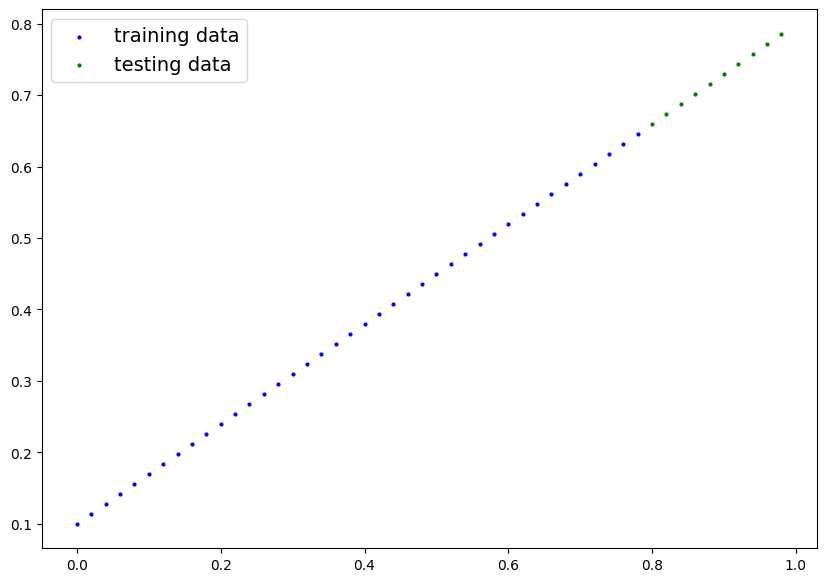

In [5]:
plot_pred()

##### Building the model


In [6]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           dtype = torch.float),
                                requires_grad=True)

    self.bias = nn.Parameter(torch.randn(1,
                                         dtype = torch.float),
                             requires_grad=True)

  ## forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


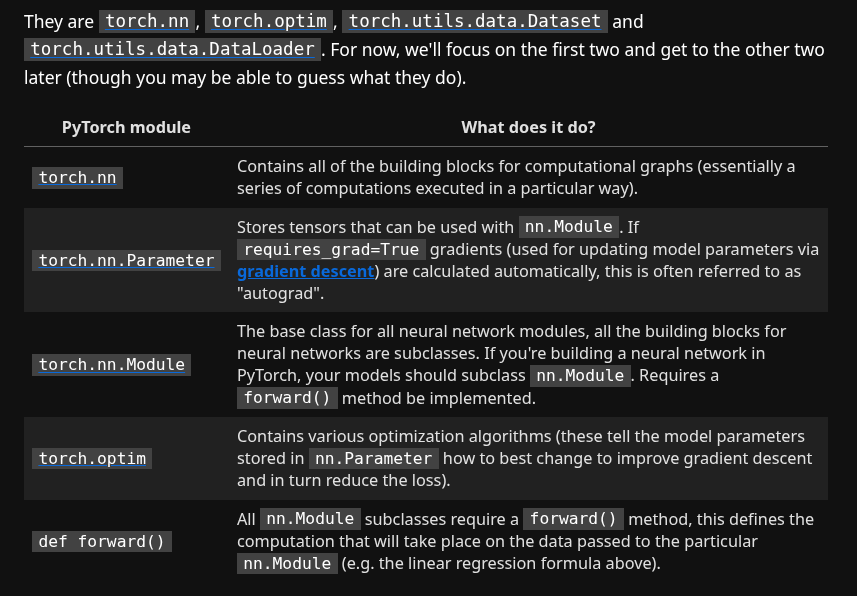

##### Checking the contents of PyTorch model

In [7]:
# set manual seed cuz nn.Parameter are randomly initialized
torch.manual_seed(42)

# creating an instance of the model (this is a subclass of nn.Module hat contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# check the nn.Parameter(s) within the nn.Module subclass
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

##### predicitons using
```
torch.inference_mode()
```
which turns off a bunch of things (like Gradient tracking, which is necessary for training but not for inference) to make forward-passess faster


In [9]:
with torch.inference_mode():
  y_preds = model_0(X_test)

In [10]:
# check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made : {len(y_preds)}")
print(f"Predicted values : \n {y_preds}")

Number of testing samples: 10
Number of predictions made : 10
Predicted values : 
 tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


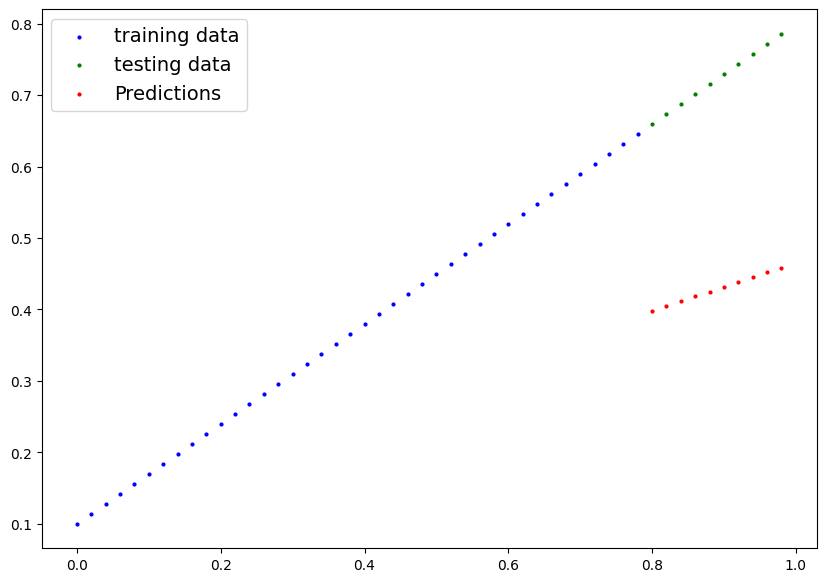

In [11]:
plot_pred(predictions = y_preds)

In [12]:
y_test - y_preds

tensor([[0.2618],
        [0.2691],
        [0.2764],
        [0.2836],
        [0.2909],
        [0.2982],
        [0.3054],
        [0.3127],
        [0.3200],
        [0.3272]])

#### The predictions look very poor. Because our model is just using random parameter values to make predictions

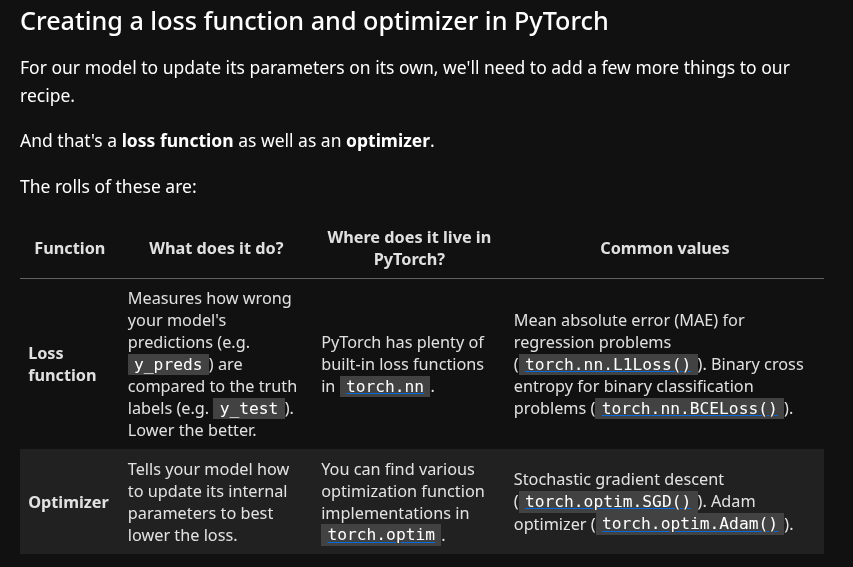

In [13]:
# create loss function
loss_fn = nn.L1Loss()

# create the optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)  ## learning rate (how much the optimizer should change parameters at each step, higher = more (less stable), lower = less ( might take long time))

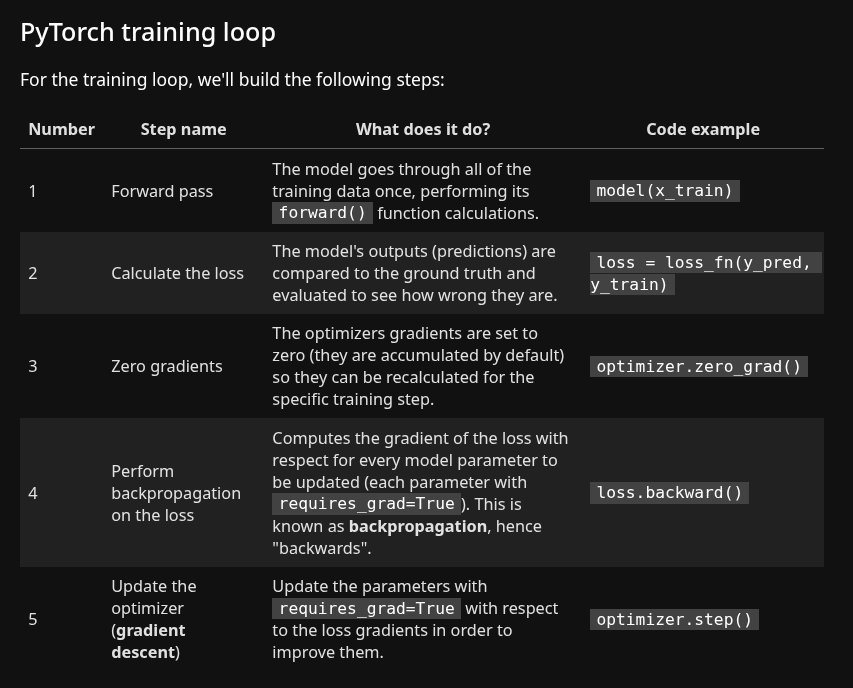

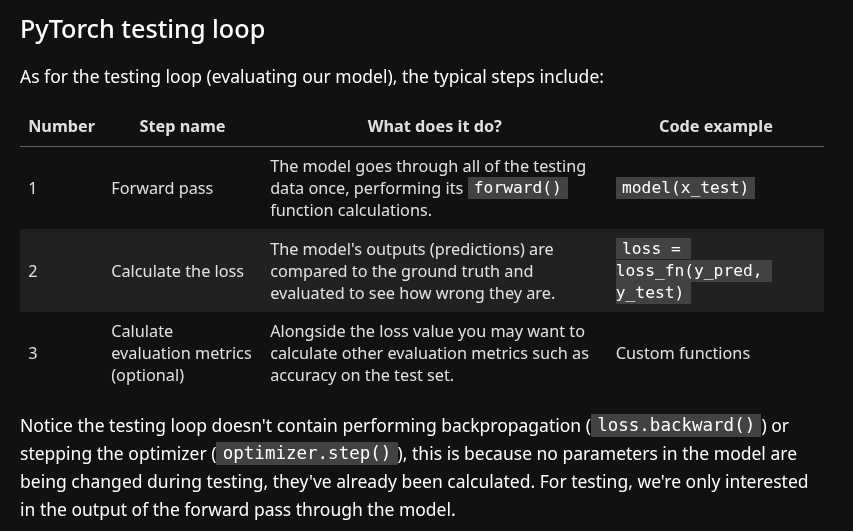

In [14]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []

epoch_count = []

print(f"Starting Training for {epochs} epochs ...")

for i in range(epochs):
  model_0.train()     ## Training phase

  y_pred = model_0(X_train)   ## Forward pass

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()   # zero grad of the optimizer

  loss.backward()   # Backpropagation

  optimizer.step()    # update weights

### Testing

# put the model in evaluatiuon mode
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)   ## Forward pass on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

  if i % 10 == 0:
    epoch_count.append(i)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())

    print(f"Epoch {i} | MAE Train Loss : {loss} | MAE Test Loss : {test_loss}")

Starting Training for 100 epochs ...
Epoch 0 | MAE Train Loss : 0.11646336317062378 | MAE Test Loss : 0.2831185758113861
Epoch 10 | MAE Train Loss : 0.07288062572479248 | MAE Test Loss : 0.20148475468158722
Epoch 20 | MAE Train Loss : 0.06079886108636856 | MAE Test Loss : 0.15944428741931915
Epoch 30 | MAE Train Loss : 0.05589393526315689 | MAE Test Loss : 0.1376386135816574
Epoch 40 | MAE Train Loss : 0.05223600193858147 | MAE Test Loss : 0.12458455562591553
Epoch 50 | MAE Train Loss : 0.048746004700660706 | MAE Test Loss : 0.11356449127197266
Epoch 60 | MAE Train Loss : 0.0453035831451416 | MAE Test Loss : 0.10529200732707977
Epoch 70 | MAE Train Loss : 0.041868384927511215 | MAE Test Loss : 0.09701952338218689
Epoch 80 | MAE Train Loss : 0.03843008354306221 | MAE Test Loss : 0.0894339382648468
Epoch 90 | MAE Train Loss : 0.03500163555145264 | MAE Test Loss : 0.08116146922111511


#### Plot the loss curves

Lower is better !!

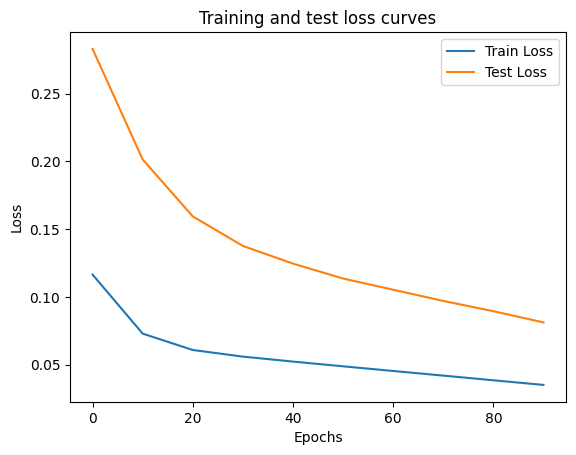

In [15]:
plt.plot(epoch_count, train_loss_values, label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [16]:
# Find out model's learned params

print("The model learned the following values for weights and bias : ")
print(model_0.state_dict())
print("\n And the original values for weights and bias are : " )
print(f"weights : {weight}, bias : {bias}")

The model learned the following values for weights and bias : 
OrderedDict({'weights': tensor([0.5429]), 'bias': tensor([0.1658])})

 And the original values for weights and bias are : 
weights : 0.7, bias : 0.1


#### From above we can see out close we get from the original weights and bias

### Making predictions with a trained PyTorch model

In [17]:
model_0.eval()

with torch.inference_mode():

  y_preds = model_0(X_test)
y_preds

tensor([[0.6001],
        [0.6110],
        [0.6219],
        [0.6327],
        [0.6436],
        [0.6544],
        [0.6653],
        [0.6762],
        [0.6870],
        [0.6979]])

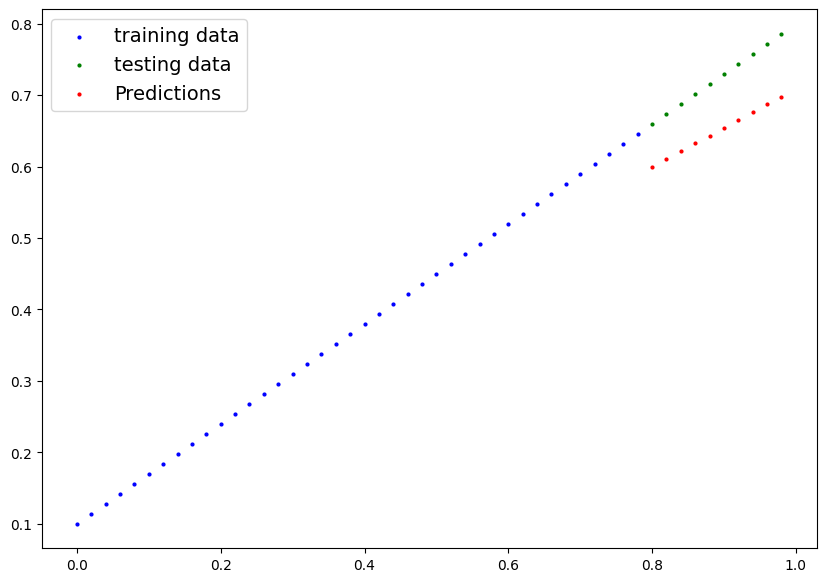

In [18]:
plot_pred(predictions = y_preds)

### Saving PyTorch model's `state_dict()`

In [20]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

## create model save path

MODEL_NAME = "FIRST_MODEL.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),    ## only saving the state_dict() only saves the models learned params
           f = MODEL_SAVE_PATH)

Saving model to : models/FIRST_MODEL.pth


### Loading the model

In [21]:
# create a instance of the model's class

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [22]:
# puting the loaded model into evaluation mode
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [23]:
## Comparing prev model predictions with the loaded model predictions

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])